<center><h1>Titanic</h1></center>

### Overview

The data has been split into two groups:

    training set (train.csv)
    test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include gender_submission.csv, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

### Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Objetivos
Los objetivos se resumen en los siguientes puntos:
* Formular de preguntas en base a las “features” de un dataset
* Manipular variables continuas y categóricas
* Normalizar y asignar representaciones numéricas a distintos tipos de “features”
* Describir estadísticamente las “features” de un dataset
* Desarrollar intuiciones y patrones de un dataset
* Utilizar visualizaciones univariables y multivariables efectivamente para inspeccionar correlación y causalidad de los datos
* Reconocer “outliers” y eliminarlos
* Limpiar datos vacios y/o corruptos
* Aplicar “Machine Learning” para la predicción de supervivencia. 
* Correctamente dividir un train y validation set
* Aplicar conceptos de underfitting y overfitting correctamente
* Diagnosticar problemas de aprendizaje
* Aplicar distintos algoritmos de clasificación
* Obtener al menos 85% de exactitud en el test set evaluado por Kaggle


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
# environment setup
sns.set()
plt.style.use('ggplot')

In [3]:
basedir = 'data'
train = pd.read_csv(os.path.join(basedir,'train.csv'),encoding='utf8')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test = pd.read_csv(os.path.join(basedir,'test.csv'),encoding='utf8')

In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# combinando train y test
titanic = train.append(test,ignore_index=True)

In [11]:
# Esto es para despues. Hay que crear unos indices para luego separar nuevamente el Titanic en Train y Test datasets.
train_idx = len(train)
test_idx = len(titanic) - len(test)

In [12]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


analizando un poco mas

In [13]:
# Crea una nueva Columna / Feature para extraer los titulos de los nombres en la columna Name
titanic['Title'] = titanic.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [14]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr


Veamos cuantos Titulos unicos existen en nuestro Titanic Dataset

In [15]:
# show count of titles
print("Existen {} titulos unicos.".format(titanic.Title.nunique()))

# show unique titles
print("\n", titanic.Title.unique())

Existen 18 titulos unicos.

 ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer' 'Dona']


In [16]:
# normalizar los titulos, creamos un diccionario para relacionar
# una palabra dictionary[key] con otra dictionary[value]

normalized_titles = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}

In [17]:
# Mapeemos / reemplasemos los titulos normalizados con los que actaalmente tenemos en nuestro Titanic Dataset
titanic.Title = titanic.Title.map(normalized_titles)

# vemos cuantos valores tenemos para los títulos normalizados
print(titanic.Title.value_counts())

Mr         757
Miss       262
Mrs        200
Master      61
Officer     23
Royalty      6
Name: Title, dtype: int64


In [18]:
#Para nuestro siguiente paso, vamos a suponer que existe una relación entre 
#la edad de una persona y su título, ya que tiene sentido que alguien que es más 
#joven tenga más probabilidades de ser titulado "Miss" que "Mrs".

#Con esto en mente, agruparemos los datos por Sexo, Pclass (Passanger Class: 1, 2 or 3) 
# y Título y luego veremos la edad promedio para las clases agrupadas.
# Agrupar por Sexo, Pclass y Titulo
grouped = titanic.groupby(['Sex','Pclass', 'Title'])

# Vemos la Edad media por Columans/features agrupados (sex, Pclass, Title)
grouped.Age.median()

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        45.0
                Officer    49.0
                Royalty    39.0
        2       Miss       20.0
                Mrs        30.0
        3       Miss       18.0
                Mrs        31.0
male    1       Master      6.0
                Mr         41.5
                Officer    52.0
                Royalty    40.0
        2       Master      2.0
                Mr         30.0
                Officer    41.5
        3       Master      6.0
                Mr         26.0
Name: Age, dtype: float64

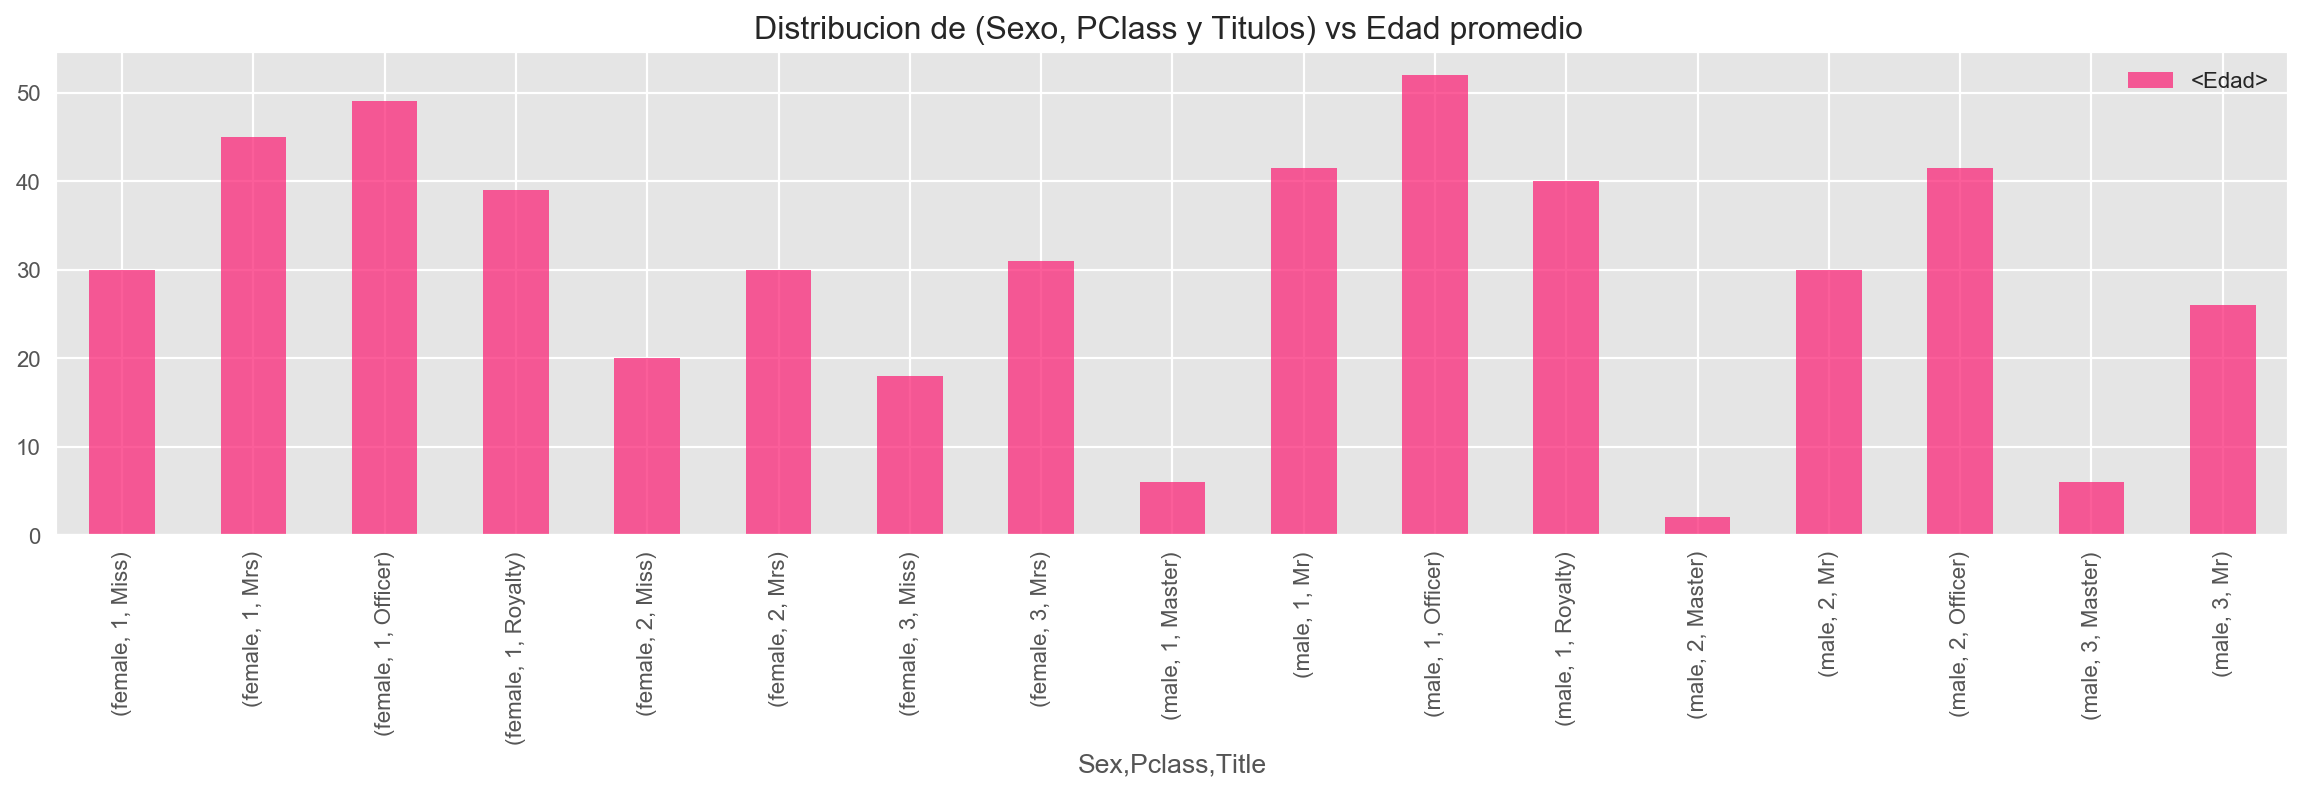

In [19]:
# visualizamos el promedio 
fig = plt.figure(figsize=(18,4), dpi=160)
alpha_level = 0.75

average_age_dist = grouped.Age.median()
average_age_dist.plot(kind='bar', label='<Edad>', color='#FA2879', alpha=alpha_level)
plt.title("Distribucion de (Sexo, PClass y Titulos) vs Edad promedio "); plt.legend(loc='best')
plt.show()

In [20]:
# Aplicamos el valor medio de las agrupaciones que realizamos para llenar los NaN en la columna de Age
titanic.Age = grouped.Age.apply(lambda x: x.fillna(x.median()))

# Ver cambios
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


In [21]:
# fill Cabin NaN with U for unknown
titanic.Cabin = titanic.Cabin.fillna('U')

In [22]:
# Encontrar el valor de Embarked mas frecuente y almasenarlo en una varialbe
most_embarked = titanic.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
titanic.Embarked = titanic.Embarked.fillna(most_embarked)

In [23]:
# fill NaN with median fare
titanic.Fare = titanic.Fare.fillna(titanic.Fare.median())

# Ver cambios
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Title          1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 133.0+ KB


Ahora tenemos un conjunto de datos completo y limpio sobre el que podemos realizar algunos análisis exploratorios. Probablemente, lo primero que queremos ver es ¿cuál fue la influencia/desajuste de los que murieron (0) frente a los que sobrevivieron (1) al Titanic?

In [24]:
# Ver el porcentaje de los que sobrevivieron vs los que murieron en el Titanic
titanic.Survived.value_counts(normalize=True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

Parece que solo el 38% de las personas a bordo del Titanic lograron sobrevivir a su fatídico viaje. Profundicemos un poco más y veamos posibilidades de supervivencia por sexo.

In [25]:
# Agrupar por sexo
group_by_sex = titanic.groupby('Sex')

# Ratio de supervivencia por Sexo
group_by_sex.Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

 El 75% de las mujeres sobrevivieron al hundimiento del Titanic, mientras que solo el 19% de los hombres lo hicieron.
 

Finalmente, vamos a dividirlo aún más por clase de pasajero y sexo.


In [26]:
# Agrupar pasajeros por Classe y Sexo
group_class_sex = titanic.groupby(['Pclass', 'Sex'])

# Ratios de Supervivencia por classe y sexo
group_class_sex.Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64



Parece que las mujeres de primera clase tenían una increíble tasa de supervivencia del 97%, mientras que los hombres de 1ra clase solo tenían un 37% de probabilidades de sobrevivir. Aunque solo tuviste un 37% de probabilidad de sobrevivir como un hombre de primera clase, aún tienes casi 3 veces más probabilidades de sobrevivir que un varón de tercera clase que tuvo la tasa de supervivencia más baja entre el sexo y la clase con un 13.5%.

Para obtener una mejor comprensión de esto, echemos un vistazo a estas figuras visualmente con algunos gráficos. Primero veremos la función Sobrevivido por Sexo.


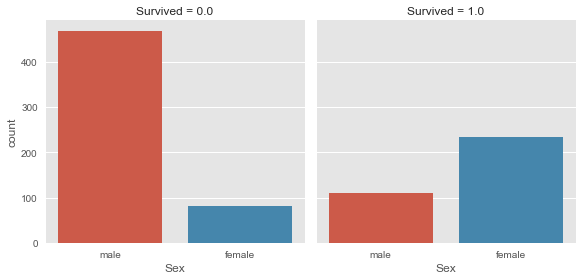

In [27]:
# plot by Survivded, Sex
_ = sns.factorplot(x='Sex', col='Survived', data=titanic, kind='count')
plt.show()

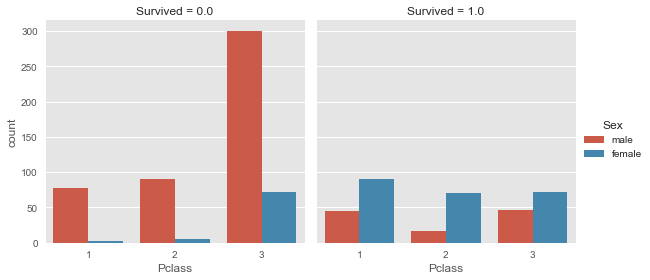

In [28]:
# plot by Pclass, Sex, Survived
_ = sns.factorplot(x='Pclass', hue='Sex', col='Survived', data=titanic, kind='count')
plt.show()



El estado social es bastante claro en sus posibilidades de sobrevivir.

Por último, tengamos una idea de algunas de las otras métricas.


In [29]:
# get stats on all the features
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.278205,33.281086,0.385027,655.000000,2.294882,0.498854,0.383838
std,13.446690,51.741500,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,26.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,36.500000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000




Ahora, sigamos adelante y creemos algunas características nuevas a partir de los datos. La primera característica que veremos en la construcción es FamilySize. Esto es importante de observar porque queremos ver si tener una familia grande o pequeña afectó las posibilidades de supervivencia de alguien.

Las características relevantes que ayudarán con esto son Parch (número de padres / niños a bordo) y SibSp (número de hermanos / cónyuges a bordo). Combinamos las funciones Parch y SibSp y agregamos 1 así como también queremos contar el pasajero para cada observación.


In [30]:
# size of families (including the passenger)
titanic['FamilySize'] = titanic.Parch + titanic.SibSp + 1



La característica de la cabina en sí misma tal como está ahora realmente no proporciona toda esa información útil. Sin embargo, podemos extraer la primera letra y de esa manera, tendríamos un conjunto agrupado de cabinas que podrían revelar algún efecto sobre la supervivencia.


In [31]:
#  Extraer la primera letra de las mismas cabinas
titanic.Cabin = titanic.Cabin.map(lambda x: x[0])

# view normalized count
titanic.Cabin.value_counts(normalize=True)

U    0.774637
C    0.071811
B    0.049656
D    0.035141
E    0.031322
A    0.016807
F    0.016043
G    0.003820
T    0.000764
Name: Cabin, dtype: float64

In [32]:
# Convertir male y female groups a una forma de numeros Integers/enteros
titanic.Sex = titanic.Sex.map({"male": 0.0, "female":1.1})

In [33]:
# create dummy variables for categorical features
pclass_dummies = pd.get_dummies(titanic.Pclass, prefix="Pclass")
title_dummies = pd.get_dummies(titanic.Title, prefix="Title")
cabin_dummies = pd.get_dummies(titanic.Cabin, prefix="Cabin")
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix="Embarked")

In [34]:
# concatenate dummy columns with main dataset
titanic_dummies = pd.concat([titanic, pclass_dummies, title_dummies, cabin_dummies, embarked_dummies], axis=1)

# drop categorical fields
titanic_dummies.drop(['Pclass', 'Title', 'Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)


In [35]:
# create train and test data
train_n = titanic_dummies[ :train_idx]
test_n = titanic_dummies[test_idx: ]

# convert Survived and Sex back to integer 0 or 1 ya que este esta en format float 0.0 or 1.0
train.Survived = train_n.Survived.astype(int)
train.Sex = train_n.Sex.astype(int)

In [53]:
train_n.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0.0,1,0.0,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,2,1.1,1,1.0,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,1.1,0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,4,1.1,1,1.0,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,5,0.0,0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [54]:
test_n.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
891,34.5,7.8292,0,892,0.0,0,NaN,1,0,0,...,0,0,0,0,0,0,1,0,1,0
892,47.0,7.0000,0,893,1.1,1,NaN,2,0,0,...,0,0,0,0,0,0,1,0,0,1
893,62.0,9.6875,0,894,0.0,0,NaN,1,0,1,...,0,0,0,0,0,0,1,0,1,0
894,27.0,8.6625,0,895,0.0,0,NaN,1,0,0,...,0,0,0,0,0,0,1,0,0,1
895,22.0,12.2875,1,896,1.1,1,NaN,3,0,0,...,0,0,0,0,0,0,1,0,0,1


## Crear el train_set , el validation_set y guardarlos en el disco

Creando el Validation dataset. En Machine Learning es comun dividir el data en estos porcentajes Del 100% del data, 20%es el test_set y otros 20% es validation_set.

extraeremos un 20% del train _dataset que tenemos y sera el validation dataset, este data es para verificar que nuestro modelo es capaz de generalizar lo que aprendio y no memorizar lo que aprendio.

Ahora podemos comenzar con la parte de modelado. Primero, necesitamos convertir los datos de un pandas dataframe a un array de numpy.


In [55]:
X = train_n.drop('Survived', axis=1).values
y = train_n.Survived.values

In [56]:
# Importar train_ test split  para partir el data en train y validation
from sklearn.model_selection import train_test_split

# Del total train dataset que tenemos, separamos 20% para el validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=20)

print('TAMAÑO ORIGINAL del set: ', X.shape)
print('TAMAÑO de X train set: ', X_train.shape)
print('TAMAÑO de X validation set: ', X_val.shape)
print('TAMAÑO de y train: ', y_train.shape)
print('TAMAÑO de y val: ', y_val.shape)

TAMAÑO ORIGINAL del set:  (891, 28)
TAMAÑO de X train set:  (712, 28)
TAMAÑO de X validation set:  (179, 28)
TAMAÑO de y train:  (712,)
TAMAÑO de y val:  (179,)


## Crear X_test (el data donde vamos a probar nuestros modelos y subir sus resultados a Kaggle)

hechar un vistazo a test set y verificar que la columna Survided existe.


In [57]:
train_n.head()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,FamilySize,Pclass_1,Pclass_2,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,1,0.0,1,0.0,2,0,0,...,0,0,0,0,0,0,1,0,0,1
1,38.0,71.2833,0,2,1.1,1,1.0,2,1,0,...,1,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,0,3,1.1,0,1.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,35.0,53.1000,0,4,1.1,1,1.0,2,1,0,...,1,0,0,0,0,0,0,0,0,1
4,35.0,8.0500,0,5,0.0,0,0.0,1,0,0,...,0,0,0,0,0,0,1,0,0,1


In [60]:
# Remover la columna 'Survided' de nuestro test dataset, ya que es esta columna la que tenemos que predecir
X_test = test_n.drop('Survived', axis=1).values
# Guardar PassengerId para el final submission
passengerId = test_n.PassengerId

In [64]:
# Crear variables para guardar nuestro train y validation set en el disk.
train_dataset = train_n[0: X_train.shape[0]]
validation_dataset = train_n[X_train.shape[0]:]

print(train_dataset.shape)
print(validation_dataset.shape)

(712, 29)
(179, 29)


In [65]:
# Guardar en el disk nuestro datasets
train_dataset.to_csv('train_set.csv', sep=',', encoding='utf-8', index=False)
validation_dataset.to_csv('validation_set.csv', sep=',', encoding='utf-8', index=False)

In [66]:
test.to_csv('test_set.csv', sep=',', encoding='utf-8', index=False )

### Modelo de Machine Learning

Importamos los paquetes que uzaremos para crear los modelos


In [67]:
# classifier models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
# for plot learning curves
from mlxtend.plotting import plot_learning_curves # install with pip install mlxtend 

### regresion logistica

In [70]:
# create param grid object

# instantiate logistic regressor
logreg_model = LogisticRegression()

# load param grid and log model into GridSearcCV
#logreg_model = GridSearchCV(estimator=log, param_grid=log_params, cv=5)

# fit model (pensar en esto como el punto donde se 'entrena el modelo')
logreg_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
accuracy = logreg_model.score(X_val,y_val)
print(accuracy)

0.865921787709


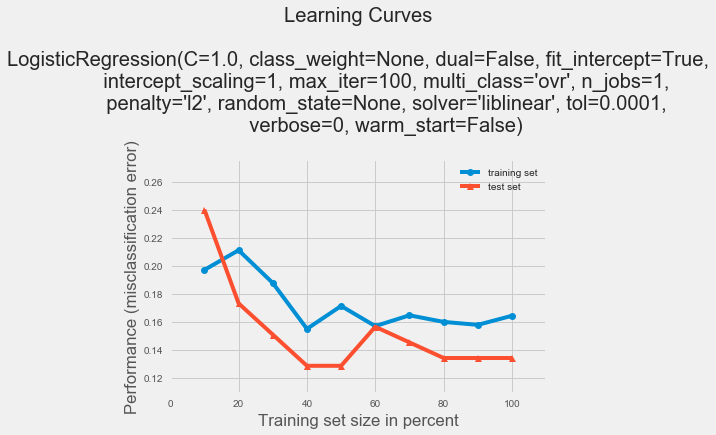

In [72]:
plot_learning_curves(X_train, y_train, X_val, y_val, logreg_model)
plt.show()

### Crear el csv que se va a subir a Kaggle con las preddiciones del modelo LogisticReg

In [76]:
# random forrest prediction on test set
log_pred = logreg_model.predict(X_test)

In [77]:
# dataframe with predictions
kaggle = pd.DataFrame( {'PassengerId': passengerId, 'Survived': log_pred} )
# asegurarnos de que el dataframe esta en el formato correcto de Kaggle
kaggle.head(10)

,PassengerId,Survived
891,892,0.0
892,893,0.0
893,894,0.0
894,895,0.0
895,896,1.0
896,897,0.0
897,898,1.0
898,899,0.0
899,900,1.0
900,901,0.0
